# Emg Finger Classification

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

## Load and visualize data

In [25]:
df = pd.read_csv("merged_1206v01_IdAssigned_zero25.csv", usecols = ['id', 'time', 'value1','value2','value3'], low_memory = True)
print(len(df))
df.tail()

22461


,id,time,value1,value2,value3
22456,0,22456,0.96,0.96,0.84
22457,0,22457,0.95,0.96,0.85
22458,0,22458,0.97,0.94,0.82
22459,0,22459,0.98,0.95,0.83
22460,0,22460,0.98,0.97,0.81


In [26]:
y = pd.read_csv("merged_1206v01_IdAssigned_labels_zero25.csv", usecols = ['id', 'label'], low_memory = True)
print(len(y))
y.head()

152


,id,label
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


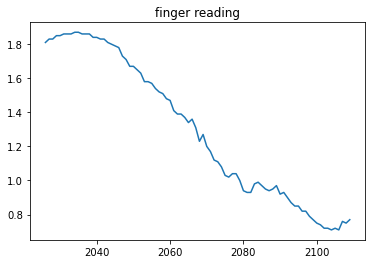

In [29]:
plt.title('finger reading')
plt.plot(df[df["id"] == 23].set_index("time").value1)
plt.show()

## Extract Features

In [7]:
X = extract_features(df, column_id="id", column_sort="time", impute_function=impute)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [02:42<00:00,  8.11s/it]


In [30]:
X

,value3__variance_larger_than_standard_deviation,value3__has_duplicate_max,value3__has_duplicate_min,value3__has_duplicate,value3__sum_values,value3__abs_energy,value3__mean_abs_change,value3__mean_change,value3__mean_second_derivative_central,value3__median,...,value2__permutation_entropy__dimension_5__tau_1,value2__permutation_entropy__dimension_6__tau_1,value2__permutation_entropy__dimension_7__tau_1,value2__query_similarity_count__query_None__threshold_0.0,"value2__matrix_profile__feature_""min""__threshold_0.98","value2__matrix_profile__feature_""max""__threshold_0.98","value2__matrix_profile__feature_""mean""__threshold_0.98","value2__matrix_profile__feature_""median""__threshold_0.98","value2__matrix_profile__feature_""25""__threshold_0.98","value2__matrix_profile__feature_""75""__threshold_0.98"
0,0.0,1.0,1.0,1.0,9350.06,12612.1296,0.023636,0.000050,-0.000001,0.930,...,3.675376,4.787406,5.894315,0.0,3.238483,15.162147,8.293887,8.641617,5.676850,10.600747
1,0.0,0.0,1.0,1.0,40.91,29.6839,0.034915,-0.003729,-0.000259,0.740,...,3.148265,3.453141,3.629574,0.0,0.803593,4.234897,2.219473,1.796156,1.380755,3.102717
2,0.0,0.0,1.0,1.0,23.94,9.5728,0.007966,-0.000508,0.000345,0.395,...,3.056137,3.515582,3.732263,0.0,0.999979,3.817458,1.938413,1.842780,1.446355,2.429450
3,0.0,1.0,0.0,1.0,69.10,63.6694,0.038929,0.000833,0.000120,0.800,...,3.150722,3.570961,3.771887,0.0,1.063673,5.262227,2.870673,2.792786,1.793051,3.920323
4,0.0,0.0,1.0,1.0,30.35,13.8791,0.009091,-0.001212,0.000231,0.440,...,1.380081,1.518560,1.614866,0.0,1.622204,7.372276,3.233592,2.806055,2.117062,3.712349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0,1.0,1.0,1.0,140.43,265.7037,0.042468,-0.005065,0.000066,1.965,...,3.352872,3.931785,4.164900,0.0,0.674045,2.515438,1.405775,1.261439,1.023405,1.624296
148,0.0,0.0,0.0,1.0,96.45,109.4113,0.020349,-0.004535,0.000353,1.060,...,3.553795,4.146748,4.325990,0.0,1.015241,4.843885,2.472525,2.217998,1.489218,3.116355
149,0.0,1.0,0.0,1.0,174.87,428.9463,0.054545,-0.007013,-0.000395,2.415,...,3.461859,3.938004,4.141888,0.0,1.573357,4.481536,2.771258,2.819409,2.194199,3.116355
150,0.0,0.0,0.0,1.0,97.62,117.7182,0.026173,-0.000741,0.000000,1.170,...,3.633117,4.010559,4.170127,0.0,0.801782,3.308357,1.791917,1.738235,1.386620,2.198297


## Select Features

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y['label'], test_size=.3, shuffle=True, random_state=1)
X_train.head()

,value3__variance_larger_than_standard_deviation,value3__has_duplicate_max,value3__has_duplicate_min,value3__has_duplicate,value3__sum_values,value3__abs_energy,value3__mean_abs_change,value3__mean_change,value3__mean_second_derivative_central,value3__median,...,value2__permutation_entropy__dimension_5__tau_1,value2__permutation_entropy__dimension_6__tau_1,value2__permutation_entropy__dimension_7__tau_1,value2__query_similarity_count__query_None__threshold_0.0,"value2__matrix_profile__feature_""min""__threshold_0.98","value2__matrix_profile__feature_""max""__threshold_0.98","value2__matrix_profile__feature_""mean""__threshold_0.98","value2__matrix_profile__feature_""median""__threshold_0.98","value2__matrix_profile__feature_""25""__threshold_0.98","value2__matrix_profile__feature_""75""__threshold_0.98"
1,0.0,0.0,1.0,1.0,40.91,29.6839,0.034915,-0.003729,-0.000259,0.740,...,3.148265,3.453141,3.629574,0.0,0.803593,4.234897,2.219473,1.796156,1.380755,3.102717
105,0.0,0.0,0.0,1.0,90.95,102.1261,0.027195,-0.002073,0.000432,1.020,...,3.449399,3.828105,4.005247,0.0,0.832743,2.635210,1.566464,1.412345,1.074453,2.056041
102,0.0,0.0,1.0,1.0,90.76,98.6560,0.029412,0.004706,-0.000119,1.085,...,3.596511,4.101234,4.288843,0.0,1.015241,4.843885,2.472525,2.217998,1.489218,3.116355
26,0.0,0.0,1.0,1.0,50.26,43.2060,0.007627,-0.007288,0.000086,0.845,...,2.873506,3.347400,3.661539,0.0,0.587364,1.437642,0.958048,0.857737,0.746941,1.181022
116,0.0,0.0,1.0,1.0,100.78,131.6174,0.044937,0.006962,0.000128,1.290,...,3.482005,3.888602,4.102586,0.0,1.247576,5.801414,3.630044,3.513617,2.857453,4.867031


In [34]:
y_train.head()

,id,label
1,1,1
105,105,2
102,102,2
26,26,0
116,116,3


In [35]:
# n_significant must be tuned
X_train_filtered_multi = select_features(X_train, y_train['label'], multiclass=True, n_significant=3)
print(X_train_filtered_multi.shape)

(106, 53)


In [36]:
print(y_train['label'].shape)

(106,)


## Model 

In [37]:
classifier_selected_multi = DecisionTreeClassifier()
classifier_selected_multi.fit(X_train_filtered_multi, y_train['label'])
X_test_filtered_multi = X_test[X_train_filtered_multi.columns]
print(classification_report(y_test['label'], classifier_selected_multi.predict(X_test_filtered_multi)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.75      0.75      0.75         8
           2       0.78      0.88      0.82         8
           3       0.67      0.86      0.75         7
           4       0.88      1.00      0.93         7
           5       0.83      0.62      0.71         8

    accuracy                           0.80        46
   macro avg       0.82      0.81      0.80        46
weighted avg       0.82      0.80      0.80        46



In [38]:
cmatrix = confusion_matrix(y_test['label'], classifier_selected_multi.predict(X_test_filtered_multi))

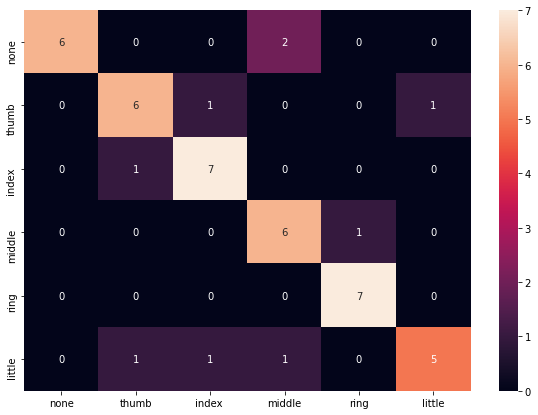

In [39]:
df_cm = pd.DataFrame(cmatrix, index = [i for i in ["none", "thumb", "index ", "middle", "ring", "little" ]],
                  columns = [i for i in ["none", "thumb", "index ", "middle", "ring", "little" ]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### Custom Data

In [ ]:
test_df = pd.read_csv('test.csv', encoding='utf8')

In [ ]:
ids = []
time = []
for i in range(len(test_df['value'])):
    ids.append(222)
    time.append(i+1)

In [ ]:
test_df['id'] = ids
test_df['time'] = time
test_df.head()

In [54]:
from tsfresh.feature_extraction.settings import from_columns
# we can easily construct the corresponding settings object
kind_to_fc_parameters = from_columns(X_train_filtered_multi)
kind_to_fc_parameters

{'value1': {'change_quantiles': [{'f_agg': 'var',
    'isabs': True,
    'qh': 0.6,
    'ql': 0.2},
   {'f_agg': 'var', 'isabs': True, 'qh': 0.6, 'ql': 0.0},
   {'f_agg': 'var', 'isabs': True, 'qh': 0.8, 'ql': 0.0}],
  'fft_coefficient': [{'attr': 'abs', 'coeff': 2}]},
 'value2': {'change_quantiles': [{'f_agg': 'var',
    'isabs': False,
    'qh': 1.0,
    'ql': 0.2},
   {'f_agg': 'var', 'isabs': False, 'qh': 1.0, 'ql': 0.4},
   {'f_agg': 'var', 'isabs': False, 'qh': 0.8, 'ql': 0.4},
   {'f_agg': 'var', 'isabs': False, 'qh': 0.8, 'ql': 0.2},
   {'f_agg': 'mean', 'isabs': True, 'qh': 1.0, 'ql': 0.2},
   {'f_agg': 'var', 'isabs': False, 'qh': 1.0, 'ql': 0.6},
   {'f_agg': 'var', 'isabs': False, 'qh': 1.0, 'ql': 0.0},
   {'f_agg': 'mean', 'isabs': True, 'qh': 1.0, 'ql': 0.4},
   {'f_agg': 'var', 'isabs': True, 'qh': 0.8, 'ql': 0.2},
   {'f_agg': 'var', 'isabs': False, 'qh': 0.8, 'ql': 0.6},
   {'f_agg': 'var', 'isabs': False, 'qh': 1.0, 'ql': 0.8},
   {'f_agg': 'mean', 'isabs': True, 'qh'

In [ ]:
X_custom = extract_features(test_df, column_id="id", column_sort="time", kind_to_fc_parameters=kind_to_fc_parameters)
print(X_custom.shape)
test_df_filtered_multi = X_custom[X_train_filtered_multi.columns]
prediction = classifier_selected_multi.predict(test_df_filtered_multi)

In [ ]:
prediction